In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#### 정보 균일도(순수도)
- 같은 것끼리 모여 잇는게 높을수록 균일도가 높다
- 1 - 엔트로피

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
feature_names = iris["feature_names"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
target = iris["target"]
target[:5]

array([0, 0, 0, 0, 0])

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### Quiz
- iris 데이터 df으로 만들기

In [8]:
df_iris = pd.DataFrame(data, columns = feature_names)
df_iris["target"] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

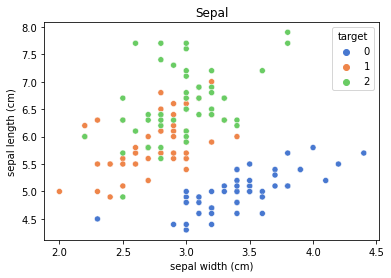

In [10]:
sns.scatterplot(data=df_iris, x = "sepal width (cm)", y = "sepal length (cm)", hue = "target", palette = "muted")
plt.title("Sepal")
plt.show()

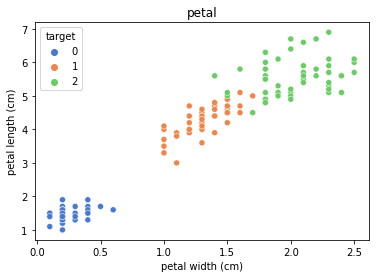

In [12]:
sns.scatterplot(data=df_iris, x = "petal width (cm)", y = "petal length (cm)", hue = "target", palette = "muted")
plt.title("petal")
plt.show()

### 데이터 불균형 확인

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_iris.drop("target",axis = 1)
y = df_iris["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [16]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [18]:
X_test.shape, y_test.shape

((38, 4), (38,))

c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

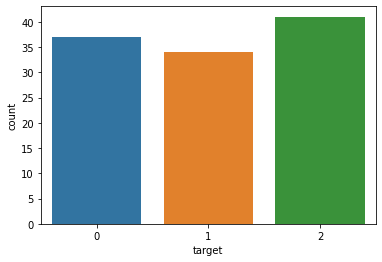

In [19]:
sns.countplot(y_train)

* label의 클래스가 균등하지 않으면 편향된 예측을 할 수 있음.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 10, stratify = y)

<AxesSubplot:xlabel='target', ylabel='count'>

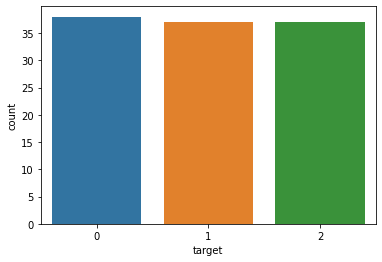

In [22]:
sns.countplot(y_train)

### 의사결정나무모형

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_dtc = DecisionTreeClassifier(random_state = 0)
model_dtc

DecisionTreeClassifier(random_state=0)

In [49]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [27]:
(y_pred == y_test).mean()

0.9736842105263158

In [28]:
y_pred[:5]

array([1, 1, 2, 2, 2])

In [30]:
y_test[:5].values

array([1, 1, 2, 2, 2])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### 의사결정나무 시각화

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

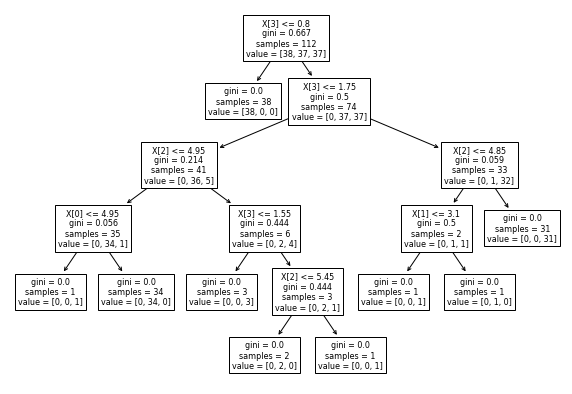

In [33]:
plt.figure(figsize = (10,7))
plot_tree(model_dtc)
plt.show()

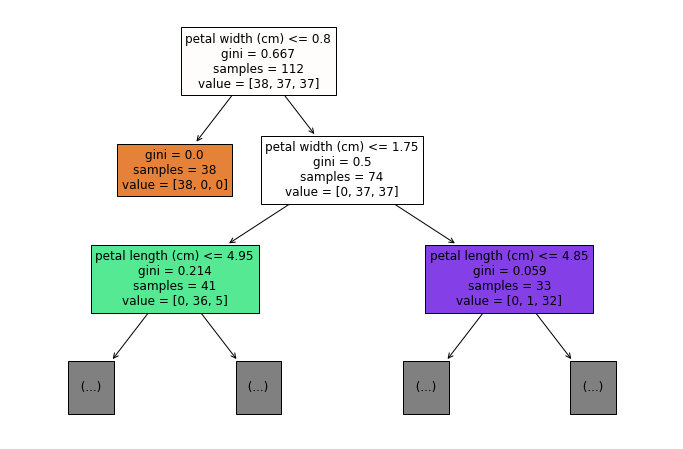

In [35]:
plt.figure(figsize = (12,8))

# filled = True : 색깔로 구분해준다.
plot_tree(model_dtc, max_depth=2, filled = True, feature_names = feature_names)

plt.show()

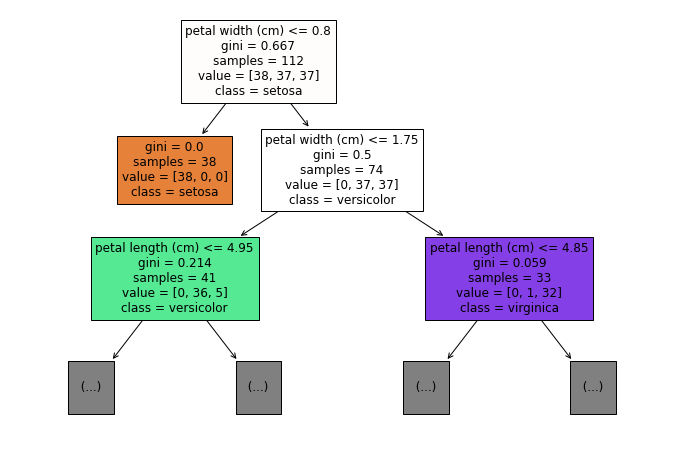

In [37]:
plt.figure(figsize = (12,8))
plot_tree(model_dtc, max_depth=2, filled = True, feature_names = feature_names, class_names = iris["target_names"])
plt.show()

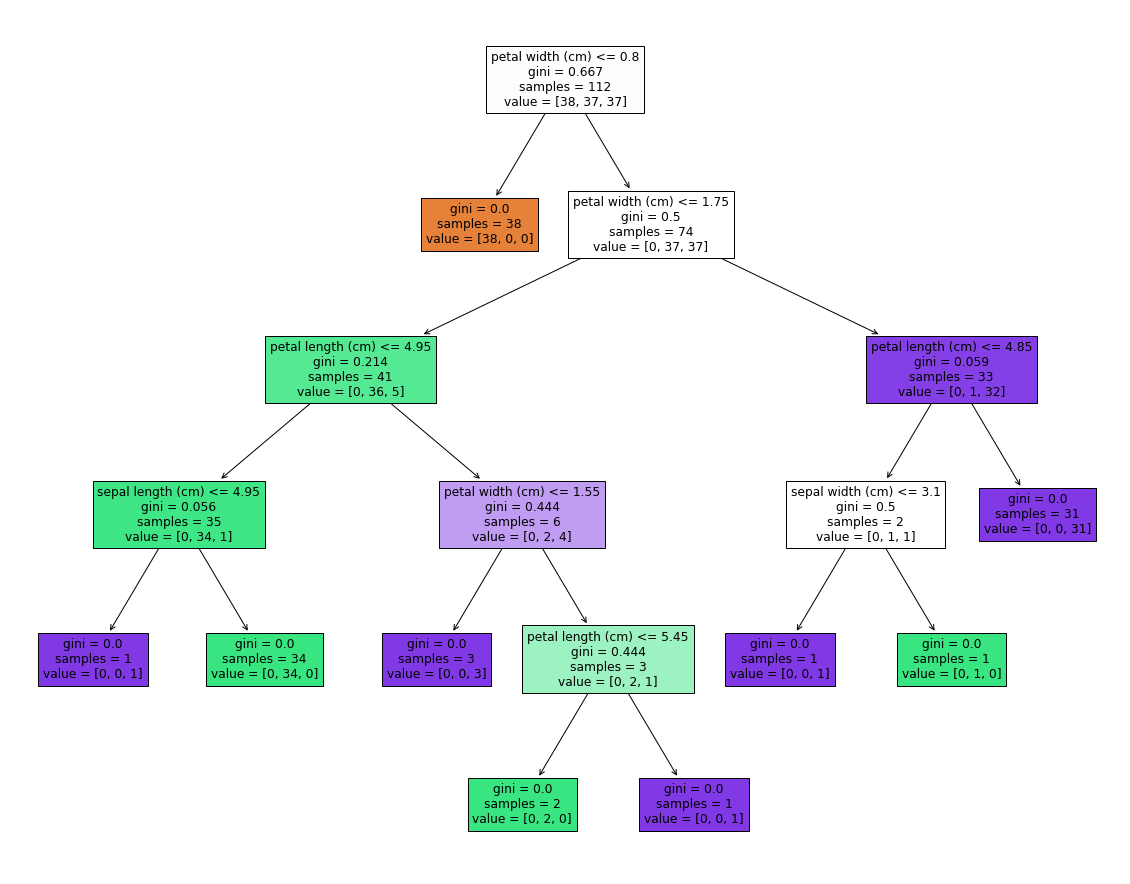

In [36]:
plt.figure(figsize = (20,16))
plot_tree(model_dtc, filled= True, feature_names=feature_names)
plt.show()

gini계수 : 불순도를 의미하며, 계수가 높을 수록 엔트로피가 큼

엔트로피가 크다는 의미는 클래스가 혼잡하게 섞여 있다는 뜻

##### Quiz
- min_samples_leaf = 4 넣어보기
- min_samples_split = 4 넣어보기

0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



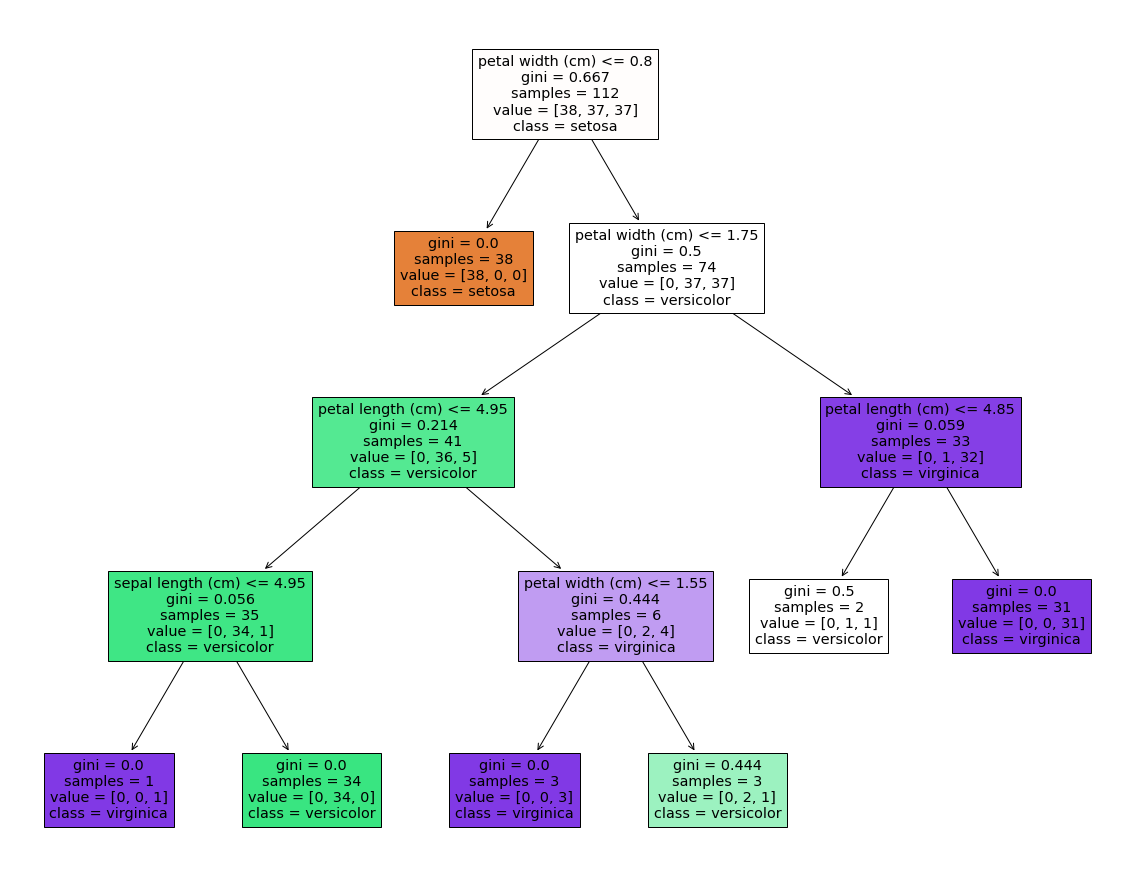

In [54]:
model_dtc2 = DecisionTreeClassifier(min_samples_split=4, random_state = 0)
model_dtc2.fit(X_train,y_train)

y_pred2 = model_dtc2.predict(X_test)
print((y_pred2 == y_test).mean())
print(classification_report(y_test,y_pred2))

plt.figure(figsize = (20,16))
plot_tree(model_dtc2, filled =True, feature_names=feature_names, class_names = iris["target_names"])

plt.show()

0.9642857142857143
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



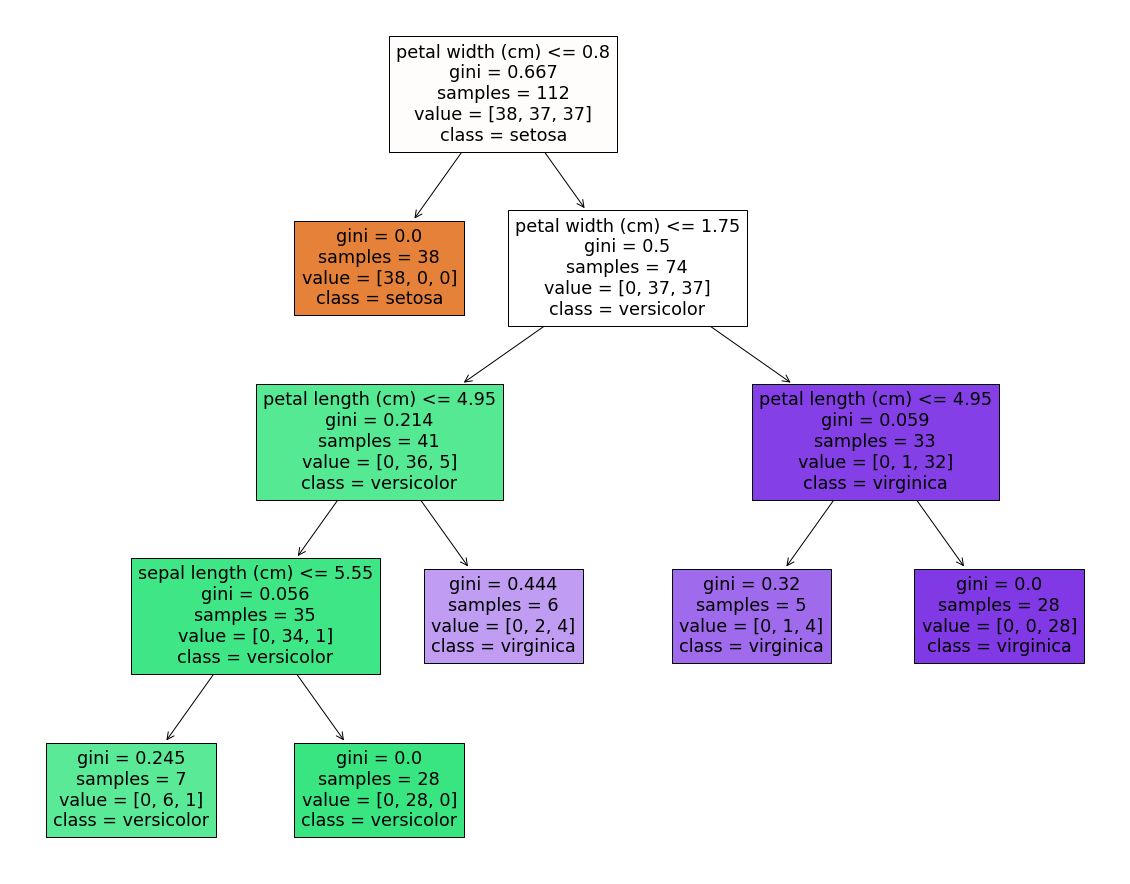

In [56]:
model_dtc3 = DecisionTreeClassifier(min_samples_leaf=4, random_state = 0)
model_dtc3.fit(X_train,y_train)

y_pred3 = model_dtc3.predict(X_test)
print(model_dtc3.score(X_train,y_train))
print((y_pred3 == y_test).mean())
print(classification_report(y_test,y_pred3))

plt.figure(figsize = (20,16))
plot_tree(model_dtc3, filled =True, feature_names=feature_names, class_names = iris["target_names"])

plt.show()

<AxesSubplot:>

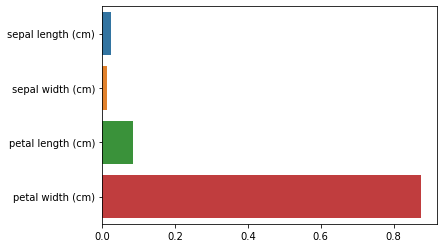

In [52]:
sns.barplot(x = model_dtc.feature_importances_, y= iris.feature_names)

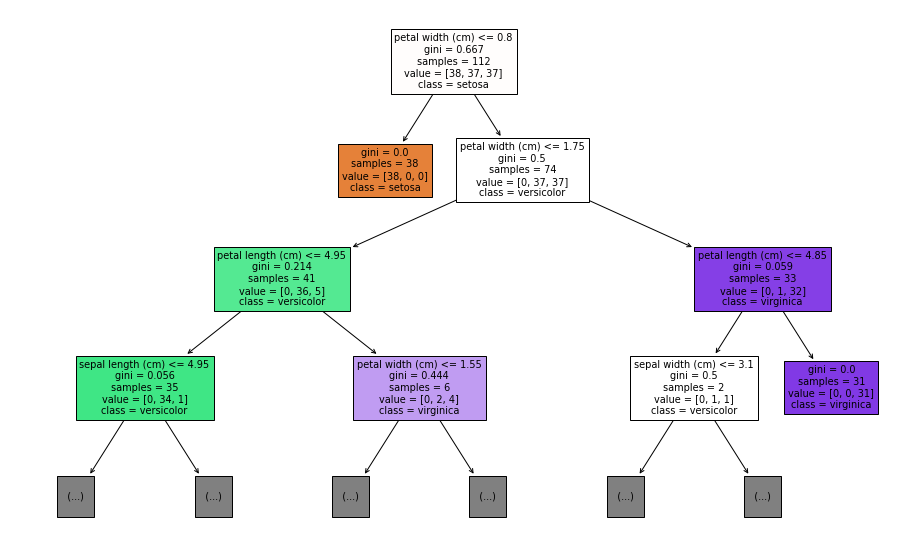

In [60]:
plt.figure(figsize = (16,10))
plot_tree(model_dtc,max_depth=3, feature_names=feature_names, class_names = iris["target_names"],filled = True)
plt.show()